# Crear gráficos
Este notebook se utilizó para crear los graficos de resumen utilizados para el artículo.

## Librerías

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [135]:
sns.set_style("whitegrid")


## Lectura de resultados

In [136]:
esp_wayuu = pd.read_excel('../Resultados - metricas test.xlsx', sheet_name='esp_wayuu')
esp_arhuaco = pd.read_excel('../Resultados - metricas test.xlsx', sheet_name='esp_arh')

wayuu_esp = pd.read_excel('../Resultados - metricas test.xlsx', sheet_name='wayuu_esp')
arhuaco_esp = pd.read_excel('../Resultados - metricas test.xlsx', sheet_name='arh_esp')

## Procesamiento de datasets para creación de gráficos

In [137]:
def clean_name(name):
    return name[name.find("(")+1:name.find(")")]

In [138]:
esp_wayuu_bleu = esp_wayuu[['Dataset', 'BLEU (Transformers)', 'BLEU  (FT Finlandés)', 'BLEU (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='BLEU')
esp_wayuu_ch = esp_wayuu[['Dataset', 'ChrF2++ (Transformers)', 'ChrF2++ (FT Finlandés)', 'ChrF2++ (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='ChrF2++').drop(columns = ['Implementación', 'Dataset'])
esp_wayuu = pd.concat([esp_wayuu_bleu, esp_wayuu_ch], axis = 1)

esp_wayuu['Implementación'] = esp_wayuu['Implementación'].apply(clean_name)

In [139]:
esp_arhuaco_bleu = esp_arhuaco[['Dataset', 'BLEU (Transformers)', 'BLEU  (FT Finlandés)', 'BLEU  (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='BLEU')
esp_arhuaco_ch = esp_arhuaco[['Dataset', 'ChrF2++ (Transformers)', 'ChrF2++ (FT Finlandés)', 'ChrF2++ (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='ChrF2++').drop(columns = ['Implementación', 'Dataset'])
esp_arhuaco = pd.concat([esp_arhuaco_bleu, esp_arhuaco_ch], axis = 1)

esp_arhuaco['Implementación'] = esp_arhuaco['Implementación'].apply(clean_name)

In [140]:
wayuu_esp_blue = wayuu_esp[['Dataset',  'BLEU  (FT Finlandés)', 'BLEU  (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='BLEU')
wayuu_esp_ch = wayuu_esp[['Dataset', 'ChrF2++ (FT Finlandés)', 'ChrF2++ (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='ChrF2++').drop(columns = ['Implementación', 'Dataset'])
wayuu_esp = pd.concat([wayuu_esp_blue, wayuu_esp_ch], axis = 1)

wayuu_esp['Implementación'] = wayuu_esp['Implementación'].apply(clean_name)

In [141]:
arhuaco_esp_blue = arhuaco_esp[['Dataset',  'BLEU  (FT Finlandés)', 'BLEU  (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='BLEU')
arhuaco_esp_ch = arhuaco_esp[['Dataset', 'ChrF2++ (FT Finlandés)', 'ChrF2++ (NLLB)']].melt(
    'Dataset', var_name='Implementación', value_name='ChrF2++').drop(columns = ['Implementación', 'Dataset'])
arhuaco_esp = pd.concat([arhuaco_esp_blue, arhuaco_esp_ch], axis = 1)

arhuaco_esp['Implementación'] = arhuaco_esp['Implementación'].apply(clean_name)

## Gráficos

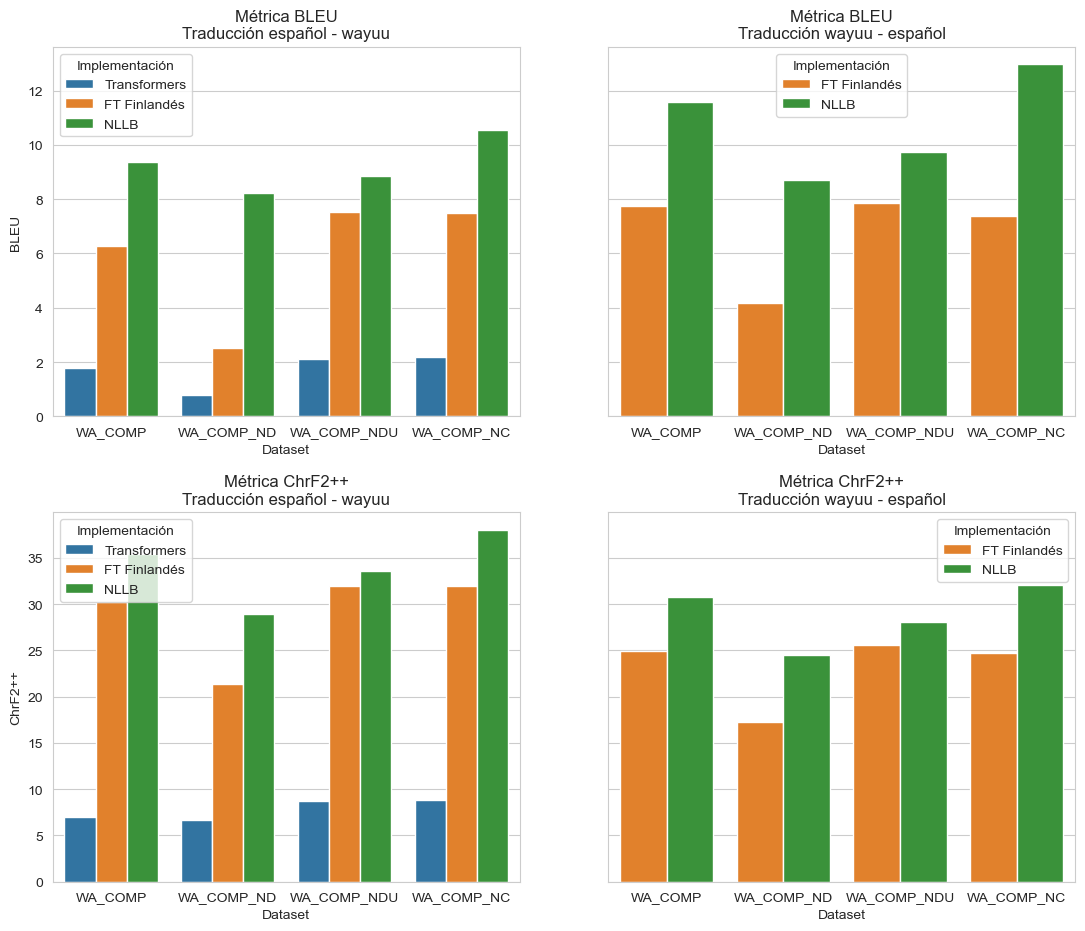

In [144]:
# Wayuu
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12,10), sharey = 'row')
fig.tight_layout(pad=5.0)

palette ={"Transformers": sns.color_palette()[0], 
          "FT Finlandés": sns.color_palette()[1], 
          "NLLB": sns.color_palette()[2]}

sns.barplot(x='Dataset', y='BLEU', hue='Implementación', data = esp_wayuu, ax = axes[0][0], palette = palette).set(
    title = 'Métrica BLEU\nTraducción español - wayuu')
sns.barplot(x='Dataset', y='ChrF2++', hue='Implementación', data = esp_wayuu, ax = axes[1][0], palette = palette).set(
    title = 'Métrica ChrF2++\nTraducción español - wayuu')

sns.barplot(x='Dataset', y='BLEU', hue='Implementación', data = wayuu_esp, ax = axes[0][1], palette = palette).set(
    title = 'Métrica BLEU\nTraducción wayuu - español')
sns.barplot(x='Dataset', y='ChrF2++', hue='Implementación', data = wayuu_esp, ax = axes[1][1], palette = palette).set(
    title = 'Métrica ChrF2++\nTraducción wayuu - español')

plt.savefig('../results/grafico_wayuu.png')

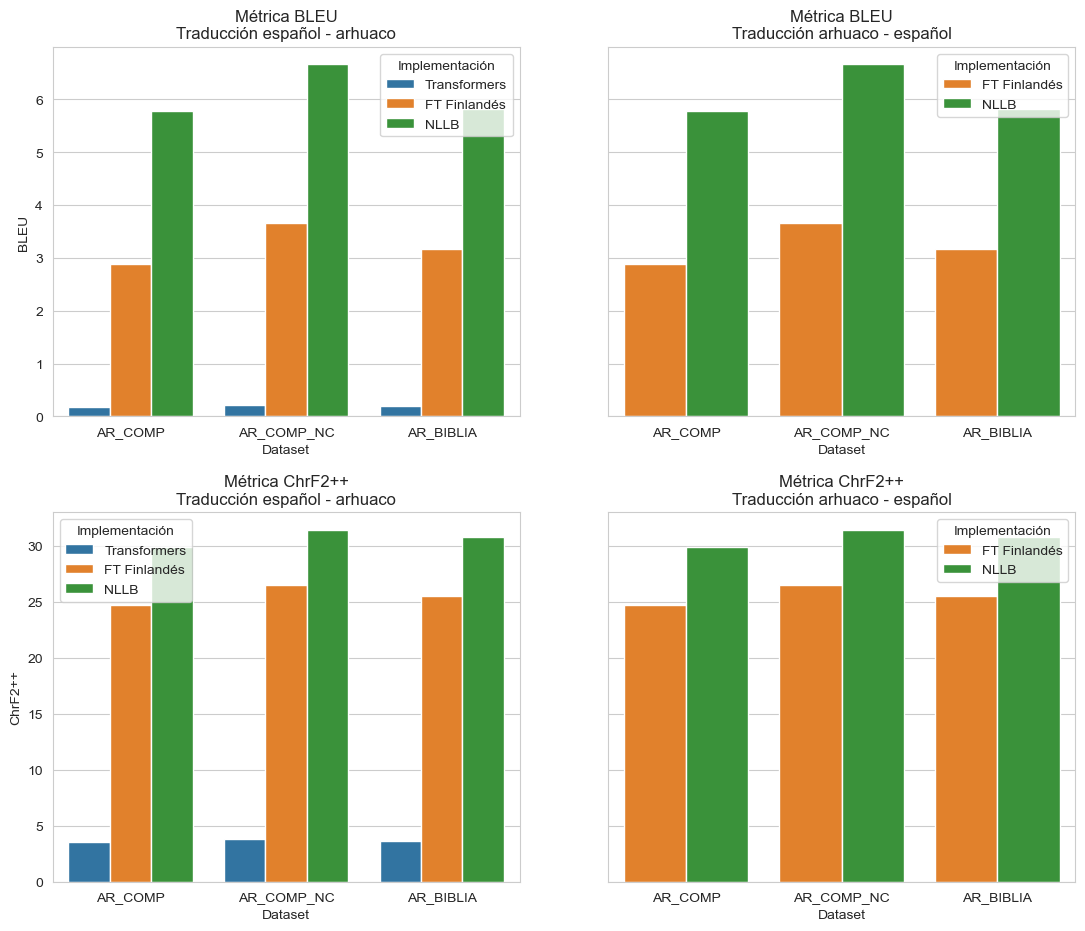

In [145]:
# Wayuu
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12,10), sharey = 'row')
fig.tight_layout(pad=5.0)

sns.barplot(x='Dataset', y='BLEU', hue='Implementación', data = esp_arhuaco, ax = axes[0][0], palette = palette).set(
    title = 'Métrica BLEU\nTraducción español - arhuaco')
sns.barplot(x='Dataset', y='ChrF2++', hue='Implementación', data = esp_arhuaco, ax = axes[1][0], palette = palette).set(
    title = 'Métrica ChrF2++\nTraducción español - arhuaco')

sns.barplot(x='Dataset', y='BLEU', hue='Implementación', data = arhuaco_esp, ax = axes[0][1], palette = palette).set(
    title = 'Métrica BLEU\nTraducción arhuaco - español')
sns.barplot(x='Dataset', y='ChrF2++', hue='Implementación', data = arhuaco_esp, ax = axes[1][1], palette = palette).set(
    title = 'Métrica ChrF2++\nTraducción arhuaco - español')

plt.savefig('../results/grafico_arhuaco.png')